# Overall
This note book shows the procedure to produce the scalability performance plot from DALiuGE

In [1]:
import os, sys, string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)

## Schema of the dataset
    0.  user name (e.g. cwu)
    1.  facility (e.g. galaxy)
    2.  pipeline (e.g. lofar_std)
    3.  time (e.g. 2016-08-22T11-52-11/)
    4.  # of nodes
    5.  # of drops
    6.  Git commit number
    7.  unroll_time
    8.  translation_time
    9.  pg_spec_gen_time
    10. created_session_at_all_nodes_time
    11. graph_separation_time
    12. push_sub_graphs_to_all_nodes_time
    13. created_drops_at_all_nodes_time
    14. Num_pyro_connections_at_all_nodes
    15. created_pyro_conn_at_all_nodes_time
    16. triggered_drops_at_all_nodes_time
    17. Total completion time

## Load the dataset

In [2]:
csv_file = 'presult_1_Sep_2016.csv'
df = pd.read_csv(csv_file, header=None)

num_tests, num_attr = df.shape
print("In total {0} tests run and {1} attributes recorded".format(num_tests, num_attr))
# just show the first three examples
df

In total 84 tests run and 18 attributes recorded


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,cwu,galaxy,lofar_test_128x128,2016-08-31T11-57-07,30,264902,b0142623e6b180de8302273efdc18cb046f389ef,33.733,652.317,0.192,0.019,4.41399979591,2.388,96.6419999599,-1,None,0.12299990654,536.896
1,cwu,galaxy,lofar_test_64x64,2016-08-31T12-40-40,60,66918,b0142623e6b180de8302273efdc18cb046f389ef,3.329,35.359,0.044,0.040,0.957999944687,1.521,5.65199995041,-1,None,0.0710000991821,452.216
2,cwu,galaxy,lofar_test_32x32,2016-08-29T21-00-57,30,17078,b0142623e6b180de8302273efdc18cb046f389ef,0.344,1.140,0.012,0.018,0.151000022888,0.769,0.375999927521,9186,14.9320001602,2.53399991989,500.512
3,cwu,galaxy,lofar_test_64x64,2016-08-31T12-40-42,60,66918,b0142623e6b180de8302273efdc18cb046f389ef,3.323,36.183,0.045,0.036,0.962999820709,1.487,5.65299987793,-1,None,0.0699999332428,511.577
4,cwu,galaxy,lofar_test_64x128,2016-08-27T10-43-59,30,133830,b0142623e6b180de8302273efdc18cb046f389ef,10.372,9.015,0.097,0.018,1.89499998093,1.471,5.83200001717,66584,620.299999952,20.8169999123,-1.000
5,cwu,galaxy,lofar_test_4x4,2016-08-24T10-49-18,9,348,None,0.005,0.285,0.001,0.010,0.00200009346008,0.342,0.0939998626709,154,0.450999975204,0.0390000343323,-1.000
6,cwu,galaxy,lofar_test_64x64,2016-08-29T19-58-32,60,66918,b0142623e6b180de8302273efdc18cb046f389ef,3.396,4.350,0.049,0.035,0.94000005722,1.531,1.48099994659,38008,164.638999939,10.8100001812,-1.000
7,cwu,galaxy,lofar_test_16x32,2016-08-27T10-40-36,60,8886,b0142623e6b180de8302273efdc18cb046f389ef,0.146,0.686,0.006,0.034,0.0820000171661,1.099,0.18799996376,4942,3.99000000954,1.30099987984,441.066
8,cwu,galaxy,lofar_test_32x32,2016-08-25T22-24-39,30,17078,b0142623e6b180de8302273efdc18cb046f389ef,0.350,1.140,0.012,0.018,0.153000116348,0.795,0.381999969482,9186,14.8949999809,2.6400001049,496.541
9,cwu,galaxy,lofar_test_32x32,2016-08-29T21-00-50,60,17078,b0142623e6b180de8302273efdc18cb046f389ef,0.344,1.134,0.012,0.036,0.180999994278,1.871,0.345999956131,9870,15.253000021,2.54999995232,480.601


## Set the filter
Show tests that have successfully completed its execution on 30 nodes (sort based on # of drops and # of relationships)

In [3]:
def filter_data(num_nodes=None, gt_num_drops=None, lt_num_drops=None, 
                git_commit=None, user=None, pipeline=None, 
                gt_test_date=None, lt_test_date=None, 
                gt_completion_time=None, lt_completion_time=None, filter_none=[16]):
    
    col_list = list(string.ascii_lowercase[0:18])
    rt = pd.DataFrame(df.values, columns=col_list)
    cond = []
    if (num_nodes != None):
        cond.append('e == %d' % num_nodes)
    if (gt_num_drops != None):
        cond.append('%s >= %d' % (col_list[5], gt_num_drops))
    if (lt_num_drops != None):
        cond.append('%s <= %d' % (col_list[5], lt_num_drops))
    if (git_commit != None):
        cond.append('%s == "%s"' % (col_list[6], git_commit))
    if (user != None):
        cond.append('%s == "%s"' % (col_list[0], user))
    if (pipeline != None):
        cond.append('%s == "%s"' % (col_list[2], pipeline))
    if (gt_test_date != None):
        cond.append('%s >= "%s"' % (col_list[3], gt_test_date))
    if (lt_test_date != None):
        cond.append('%s <= "%s"' % (col_list[3], lt_test_date))
    for rm in filter_none:
        cond.append('%s != "None"' % col_list[rm])
        cond.append('%s != -1' % col_list[rm])
    rt = pd.DataFrame(rt.query(' & '.join(cond)).values)
    return rt.sort_values(by=[5, 14])
#test_filter = filter_data(60, lt_num_drops=10000, lt_test_date='2016-08-29T21-00-56')
test_filter = filter_data(user='cwu', filter_none=[17], gt_test_date='2016-08-31T00-00-56')
test_fi = filter_data(user='cwu', filter_none=[14, 15, 16, 17], pipeline='lofar_test_8x16')
test_filter.shape
test_fi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
3,cwu,galaxy,lofar_test_8x16,2016-08-25T19-07-21,25,2226,None,0.0320001,0.42,0.00200009,0.017,0.0150001049042,0.957,0.0650000572205,1288,1.18200016022,0.327999830246,435.89
2,cwu,galaxy,lofar_test_8x16,2016-08-27T10-47-17,30,2226,b0142623e6b180de8302273efdc18cb046f389ef,0.0309999,0.338,0.000999928,0.0179999,0.0160000324249,0.654,0.063000202179,1326,1.11599993706,0.345999956131,419.568
0,cwu,galaxy,lofar_test_8x16,2016-08-25T19-08-37,50,2226,None,0.0320001,0.337,0.00100017,0.0289998,0.0190000534058,1.012,0.0739998817444,1466,1.26900005341,0.380999803543,426.077
1,cwu,galaxy,lofar_test_8x16,2016-08-27T10-47-22,60,2226,b0142623e6b180de8302273efdc18cb046f389ef,0.0320001,0.376,0.000999928,0.0350001,0.0199999809265,1.077,0.0780000686646,1466,1.31500005722,0.355999946594,418.456


## Plot 1
The first set of graphs show the time spend on varoius metrics when we increase the number of Drops or Drop relationships given a fixed set of nodes (e.g. 30 or 60).

After filtering as shown above, we also want to make sure all data values of our intersted columns are of "numeric" type, and we also want to sort the dataset based on the number of Drops as this plot requires

In [4]:
col_list = [5] + list(range(7, 18))
ttr = test_filter[col_list].sort_values(by=[5])
ttr[col_list] = ttr[col_list].apply(pd.to_numeric, errors='coerce')

Then, we let Pandas do the heavy-lifting of data aggregation and calculation

In [5]:
ttr.groupby([5]).mean()

,7,8,9,10,11,12,13,14,15,16,17
5,,,,,,,,,,,
66918,3.326333,36.259833,0.044500,0.029167,0.902833,1.236500,5.805167,-1,NaN,0.0555,465.735833
133830,10.209000,149.975333,0.094667,0.028833,1.996833,1.682667,23.787000,-1,NaN,0.0785,470.376000
264902,33.745600,657.907400,0.193400,0.025400,4.228000,2.471400,91.361200,-1,NaN,0.1290,543.533000


Just to make sure the above group by aggregation is correct:

Let Pandas calculate the error as well:

In [6]:
ttr.groupby([5]).std()

,7,8,9,10,11,12,13,14,15,16,17
5,,,,,,,,,,,
66918,0.008571,1.065263,0.000548,0.010128,0.062323,0.228798,0.118697,0.0,NaN,0.012942,40.149899
133830,0.031267,0.673006,0.000816,0.009704,0.061525,0.166049,2.785850,0.0,NaN,0.008264,29.772065
264902,0.036957,12.560625,0.002074,0.008325,0.262099,0.150978,7.092597,0.0,NaN,0.009165,17.418914


Based on the above playing around, we are able to write a function to do the plotting job:

In [7]:
def plot_time_vs_drops(runs_data, num_nodes, x_axis='num_drops', pyro_time=False):
    """
    pyro_time: include time for establishing pyro relationships?
                default=True
    """
    col_list = [5] + list(range(7, 18))
    ttr = runs_data[col_list].sort_values(by=[5])
    ttr[col_list] = ttr[col_list].apply(pd.to_numeric, errors='coerce')
    
    yv = ttr.groupby([5]).mean()
    if (x_axis == 'num_rel'):
        x = yv.ix[:, 14].values
        x_label = '# of Relationships'
    else:
        x = yv.index.values
        x_label = '# of Drops'
    y1 = yv.ix[:, 7:13].values
    y2 = yv.ix[:, 15:17].values.astype(float)
    y3 = y2.T[2]# - y2.T[1] - y2.T[0] # get the execution time
    y4 = np.vstack([y2.T, y3.T]).T
    
    ye = ttr.groupby([5]).std()
    ye1 = ye.ix[:, 7:13].values
    ye2 = ye.ix[:, 15:17].values.astype(float)
    ye3 = ye2.T[2]# - ye2.T[1] - ye2.T[0] # get the error of execution time
    ye4 = np.vstack([ye2.T, ye3.T]).T

    labels_1 = ['unroll', 'translate', 'pg_spec', 'session', 'separation', 'push_graph', 'created_drop']
    marker_1 = ['o', 'v', '^', '8', 's', 'x', 'D']
    labels_2 = ['relation', 'trigger', 'completion', 'execution']
    marker_2 = marker_1[0:5]
    f = plt.figure(1)
    f.suptitle("Time spent when increasing the {1} running on {0} nodes".format(num_nodes, x_label), fontsize=17)
    plt.subplot(121)
    for i in range(len(labels_1)):
        lines = plt.errorbar(x, y1[:, i], linewidth=2, label=labels_1[i], yerr=ye1[:, i],
                 marker=marker_1[i], markersize=9, markerfacecolor='none', markeredgewidth=2)
        lines[0].set_markeredgecolor(lines[0].get_color())
    plt.legend(loc='upper left', fontsize=15)
    plt.ylabel('Seconds', fontsize=15)
    plt.xlabel(x_label, fontsize=15)
    plt.title('Preparation related time', fontsize=15)
    plt.subplot(122)
    for i in range(len(labels_2)):
        if (not pyro_time and (labels_2[i] in ['relation', 'completion'])):
            continue
        lines = plt.errorbar(x, y4[:,i], linewidth=2, label=labels_2[i], yerr=ye4[:, i],
                 marker=marker_2[i], markersize=9, markerfacecolor='none', markeredgewidth=2)
        lines[0].set_markeredgecolor(lines[0].get_color())
    orientation = 'upper right' if pyro_time else 'upper left'
    plt.legend(loc=orientation, fontsize=15)
    plt.ylabel('Seconds', fontsize=15)
    plt.xlabel(x_label, fontsize=15)
    plt.title('Execution related time', fontsize=15)


First, try 30 nodes

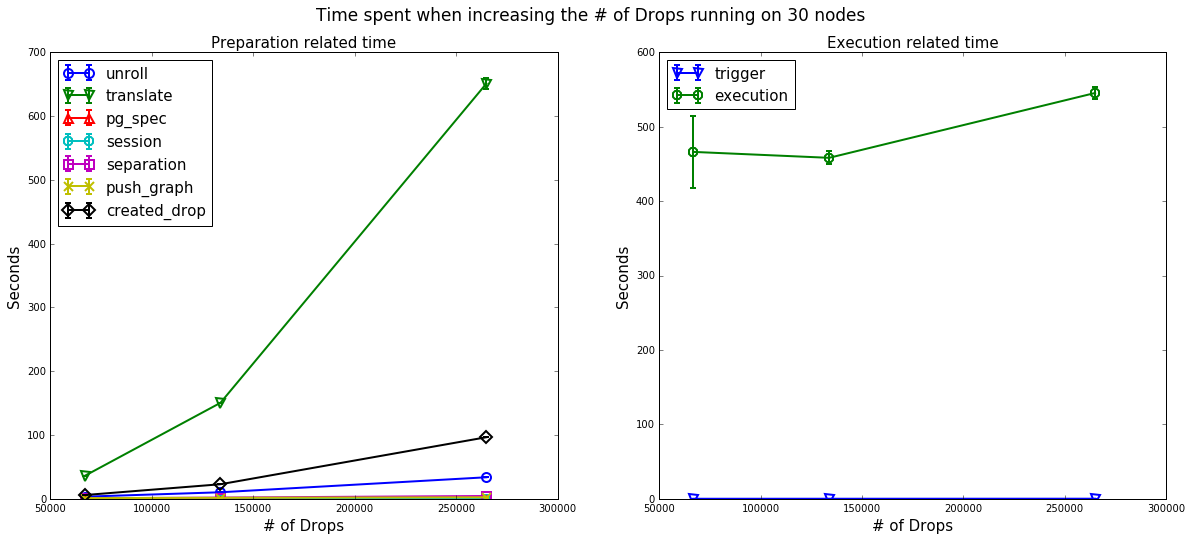

In [8]:
nb_nodes = 30
plot_time_vs_drops(filter_data(num_nodes=nb_nodes, user='cwu', filter_none=[17], 
                               gt_test_date='2016-08-31T00-00-56'), num_nodes=nb_nodes, 
                               pyro_time=False)

Notice that the "translation" time has gone wild. This is a bug that has been fixed in this [commit](https://github.com/SKA-ScienceDataProcessor/dfms/commit/fceac646a6dd06d5c80e47787bd87dbd971374ea). It should have been an order of magnitude lower, about 61 seconds for 264,920 drops.

Now try 60 nodes...

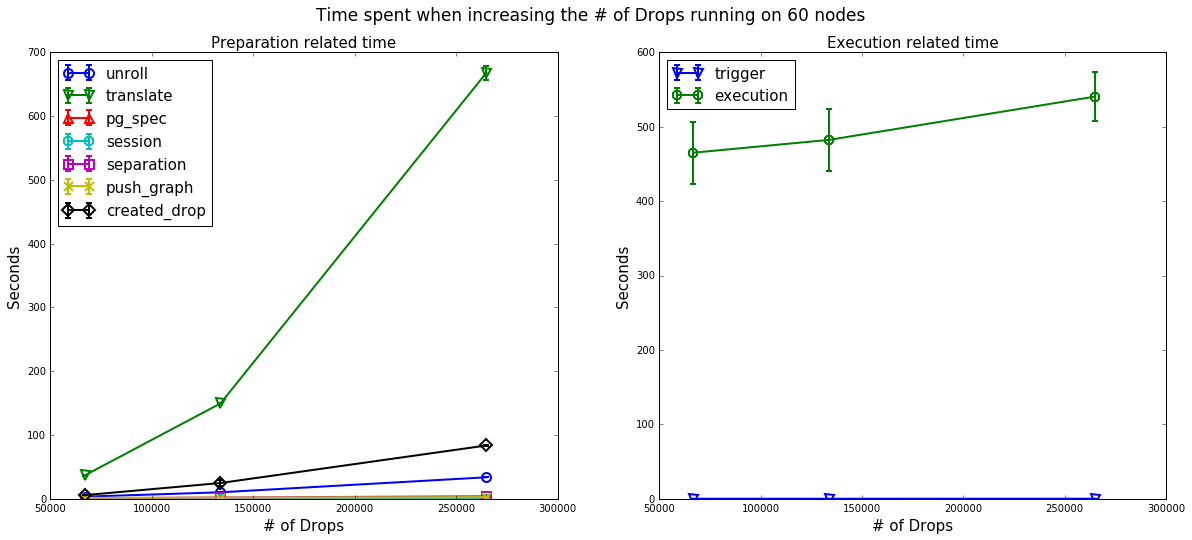

In [9]:
nb_nodes = 60
plot_time_vs_drops(filter_data(num_nodes=nb_nodes, user='cwu', filter_none=[17], 
                               gt_test_date='2016-08-31T00-00-56'), num_nodes=nb_nodes, pyro_time=False)

## Plot 2
The association between # of Drops and # of Relationships under different # of Nodes

In [10]:
def plot_rel_vs_drops(num_nodes=[]):
    markers = itertools.cycle((',', '+', '.', 'o', '*'))
    for nn in num_nodes:
        run = df[(df[4] == nn) & (df[14] != -1)].sort_values(by=[5, 14])
        x = run.ix[:, 5].values
        y = run.ix[:, 14].values
        ls = plt.plot(x, y, label='{0} nodes'.format(nn), marker=markers.next(), 
                 markersize=10, markeredgewidth=2, markerfacecolor='none', linewidth=2)
        ls[0].set_markeredgecolor(ls[0].get_color())
    plt.ylabel('# of Relationships', fontsize=15)
    plt.xlabel('# of Drops', fontsize=15)
    plt.legend(loc='upper left', fontsize=15)

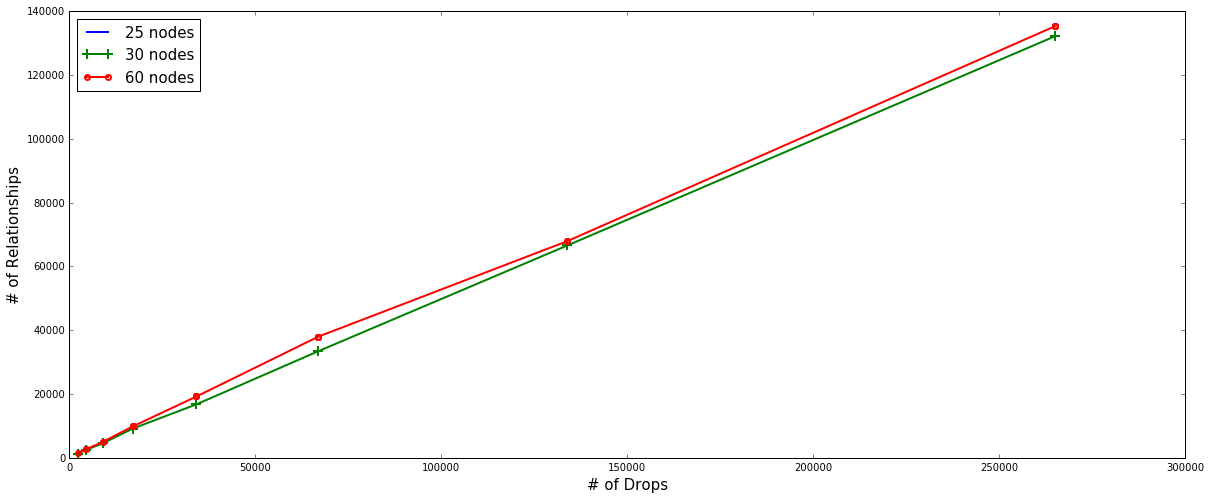

In [11]:
plot_rel_vs_drops(num_nodes=[25,30,60])

## Plot 3
the time spend on varoius metrics when we increase the # of nodes given a fixed set of Drops. Since the level of # of nodes is not so many, it is best to use a bar chart to illustrate this.

In [12]:
fda = filter_data(filter_none=[17], gt_test_date='2016-08-31T00-00-56')
gby_nodes = fda.groupby(4)
#gby_nodes.groups

In [13]:
df30 = fda.iloc[gby_nodes.groups[30]][[5, 15, 16, 17]]
df30

,5,15,16,17
13,66918,None,0.0450000762939,439.165
14,133830,None,0.0699999332428,459.517
7,264902,None,0.138000011444,517.45
11,66918,None,0.0440001487732,521.79
0,264902,None,0.12299990654,536.896
9,264902,None,0.121999979019,550.208
1,66918,None,0.0710000991821,452.216
10,133830,None,0.085000038147,529.756
16,264902,None,0.121999979019,549.29


In [14]:
df60 = fda.iloc[gby_nodes.groups[60]][[5, 15, 16, 17]]
df60

,5,15,16,17
2,66918,None,0.0699999332428,511.577
5,66918,None,0.0440001487732,437.824
3,133830,None,0.0869998931885,454.193
6,66918,None,0.0590000152588,431.843
8,133830,None,0.0859999656677,463.387
12,133830,None,0.0720000267029,466.532
4,133830,None,0.0710000991821,448.871
15,264902,None,0.140000104904,563.821


In [15]:
dt1 = df30[17].astype(float)# - df30[16].astype(float) - df30[15].astype(float)
df30_1 = pd.DataFrame({'17_30': list(dt1)}, index=list(df30[[5]].values[:,0]))
df30_1

,17_30
66918,439.165
133830,459.517
264902,517.450
66918,521.790
264902,536.896
264902,550.208
66918,452.216
133830,529.756
264902,549.290


In [16]:
dt2 = df60[17].astype(float)# - df60[16].astype(float) - df60[15].astype(float)
df60_1 = pd.DataFrame({'17_60': list(dt2)}, index=list(df60[[5]].values[:,0]))
df60_1

,17_60
66918,511.577
66918,437.824
133830,454.193
66918,431.843
133830,463.387
133830,466.532
133830,448.871
264902,563.821


In [17]:
both_df_t = df30_1.join(df60_1).sort_index()
both_df = both_df_t.groupby(both_df_t.index).mean()
both_df_err = both_df_t.groupby(both_df_t.index).std()
both_df_err

,17_30,17_60
66918,38.467130,38.459050
133830,37.544325,7.548039
264902,15.266200,0.000000


In [18]:
both_df

,17_30,17_60
66918,471.0570,460.414667
133830,494.6365,458.245750
264902,538.4610,563.821000


In [19]:
nodes_30 = both_df[['17_30']].values.flatten()
nodes_30_err = both_df_err[['17_30']].values.flatten()

In [20]:
nodes_60 = both_df[['17_60']].values.flatten()
nodes_60_err = both_df_err[['17_60']].values.flatten()

In [21]:
x_tick_labels = [str(x) + ' Drops' for x in sorted(both_df.index.values)]
x_tick_labels

['66918 Drops', '133830 Drops', '264902 Drops']

In [22]:
N = len(nodes_30)

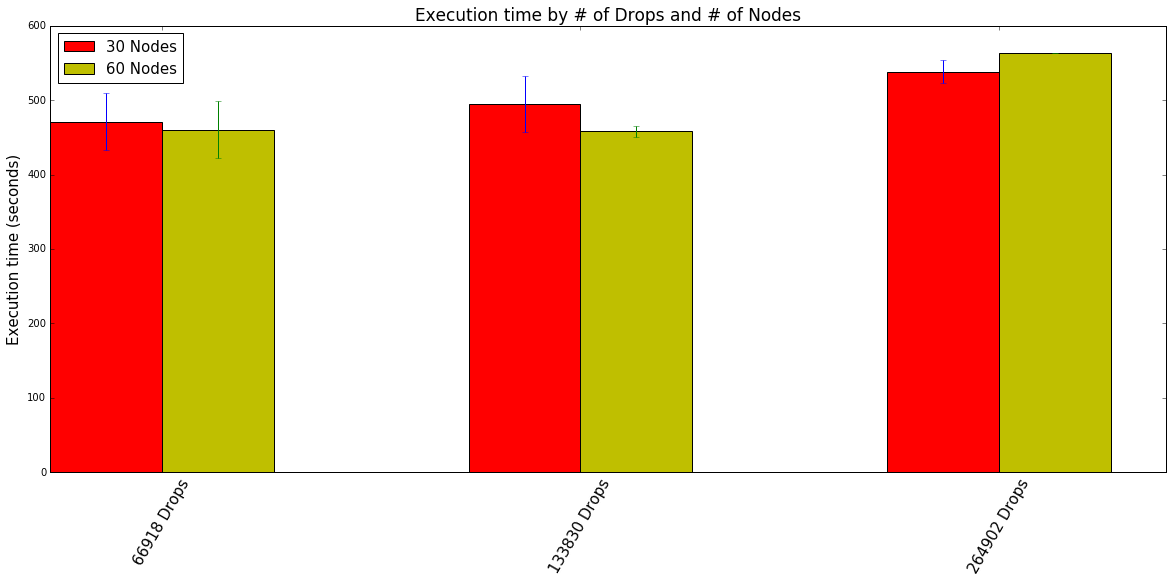

In [23]:
width = 0.4
ind = np.arange(N) * 1.5
b1 = plt.bar(ind, nodes_30, width, color='r', yerr=nodes_30_err)
b2 = plt.bar(ind + width, nodes_60, width, color='y', yerr=nodes_60_err)
plt.xticks(ind + width, x_tick_labels, fontsize=15, rotation=60)
plt.ylabel('Execution time (seconds)', fontsize=15)
plt.title('Execution time by # of Drops and # of Nodes', fontsize=17)
plt.legend((b1, b2), ('30 Nodes', '60 Nodes'), loc='upper left', fontsize=15)